# Métodos de agrupamiento

En este ejercicio, aplicaremos los conceptos vistos en clase referentes a métodos de agrupamiento no supervisados. Específicamente, explorarás el uso de KMeans y DBScan usando la librería de scikit-learn. En la primera sección analizaremos K-means y en la segunda DBScan


## 1. K-means

In [83]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN, KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
random_state = 0 # Fijamos la semilla aleatoria para que siempre den los mismos datos
np.random.seed(random_state)
# Podemos establecer los colores con los que se graficará con matplotlib
# utilizando un cmap distinto
matplotlib.rc('image')

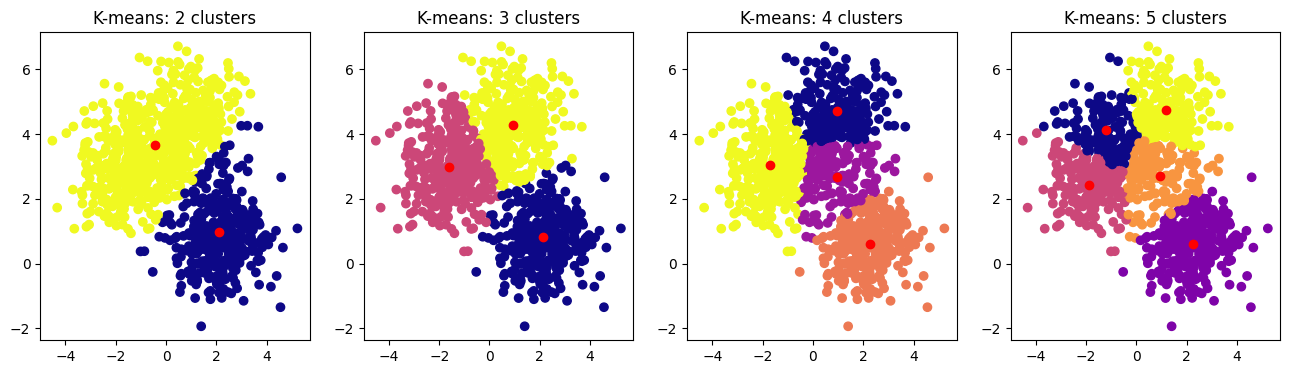

In [84]:
# Generaremos 3 blobs, cada uno con datos iguales. En total habran 1000 puntos distribuidos en estos blobs.
n_samples = 1000
X, _ = datasets.make_blobs(n_samples=n_samples, centers=3, random_state=random_state)

# Utilizaremos el algoritmo de KMeans para encontrar clusters en los datos
n_cols = 4
n_clusters_list = [2, 3, 4, 5]
rows = len(n_clusters_list) // n_cols
fig, axes = plt.subplots(rows, n_cols, figsize=(4*n_cols, 4))
axes = axes.flatten()
for ax, n_clusters in zip(axes, n_clusters_list):
    # TODO: Encuentra los clusters utilizando el algoritmo de KMeans implementado en scikit-learn
    # ====== Start of solution =====
    
    # Instanciar KMeans con el número deseado de clusters
    kmeans = KMeans(n_clusters)
    # Entreno del modelo
    kmeans.fit(X)

    # TODO: Grafica los datos usando scatter, recuerda que X = (x, y)
    ax.scatter(X[:, 0], X[:, 1], c=kmeans.labels_ , cmap='plasma')

    # TODO: Lee la documentación de sklearn para obtener los centroides del modelo entrenado
    # y grafícalos con ax.scatter

    centroides = kmeans.cluster_centers_
    ax.scatter(centroides[:, 0], centroides[:, 1], c='red')  # Graficar los centroides 
    ax.set_title(f"K-means: {n_clusters} clusters")

plt.show()

En la sección anterior utilizamos 2, 3, 4 y 5 clusters para encontar patrones en los datos y los resultados se graficaron.

TODO: Contesta la siguiente pregunta

- ¿Cúal propuesta de clusters consideras la mejor y porqué?
Consideramos que tres clusters es mejor ya que se ve una division mas natural de los datos, sin embargo no tenemos algun criterio fuerte en el cual basar nuestra respuesta. 

## 1.2 Definiendo métricas de evaluación

En el algoritmo de K-means debemos seleccionar la cantidad de clusters para poder hacer fit al modelo. Para decidir cuantos clusters utilizar podemos evaluar visualmente o hacer un análisis cuantitativo. 

Una estrategia común para realizar el análisis consiste en entrenar modelos con multiples propuestas de k-grupos y seleccionar la propuesta con el mejor rendimiento. Para ello se debe utilizar una métrica que evalúe el desempeño del algoritmo.

El ["silhouette score"](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) es una métrica muy útil para este objetivo que consiste en medir la distancia intra-grupo e inter-grupo. Esta métrica considera como buen grupo a aquel que tiene una pequeña distancia promedio intra-grupo y que se encuentra muy separado de los demas grupos. Un acomodo con buenos grupos tendrá un silhoute score cercano a 1 y una mala selección de grupos tendrá un score cercano -1. 

En la siguiente sección seguiremos esta estrategia para determinar la mejor cantidad de grupos en los datos provistos.

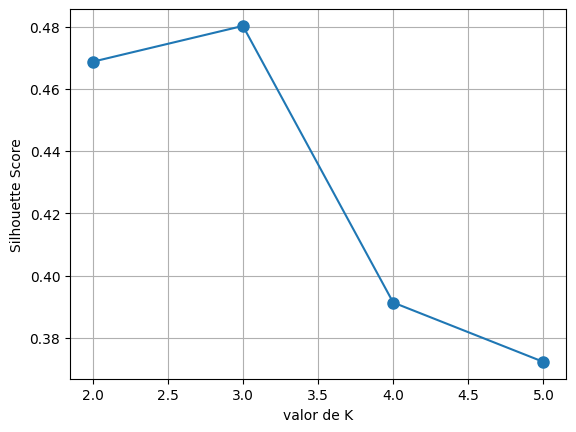

In [85]:
from sklearn.metrics import silhouette_score

Ks = range(2,6)
scores = []
for k in Ks:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    # TODO: Obten el silhouete score de nuestro modelo
    # ====== Start of solution =====
    score = silhouette_score(X, kmeans.labels_, metric='euclidean')
    # ====== End of solution =====
    scores.append(score)

plt.plot(Ks,scores,'-o', markersize=8)
plt.xlabel("valor de K")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

### TODO: Contesta la siguiente pregunta

De acuerdo al silhouete score
- ¿Qué sería mejor, elegir 4 o 5 clusters? De acuerdo al silhouete score seria mejor utilizar 4 clusters.
- ¿Cuántos clusters se deberían utilizar para entrenar el algoritmo? ¿Concuerda con tu selección realizada tras visualizar los datos? Se deberia utilizar 3 clusters ya que es el que tiene el silhouete score mas alto, y si, concuerda con nuestra seleccion. 

## 1.3 Rompiendo las asunciones de K-Means

K-means es un algoritmo que funciona en base a algunas asunciones que pueden no siempre ser ciertas, en esta seccion analizaremos algunos casos en los cuales el K-means puede que no genere la solución esperada.

In [86]:
n_samples=200
# =============================================================================
# Generamos diferentes conjuntos de datos que rompen las asunciones de K-Means
# =============================================================================
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
# Blobs con varianzas variadas
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# Cada dataset es un tuple (datos, etiquetas)
datasets = {"Círculos": noisy_circles,
            "Lunas": noisy_moons, 
            "Blobs": blobs, 
            "Varianzas distintas": varied,
            # "Aleatorio": no_structure,
            "Datos anisotrópicos": aniso}

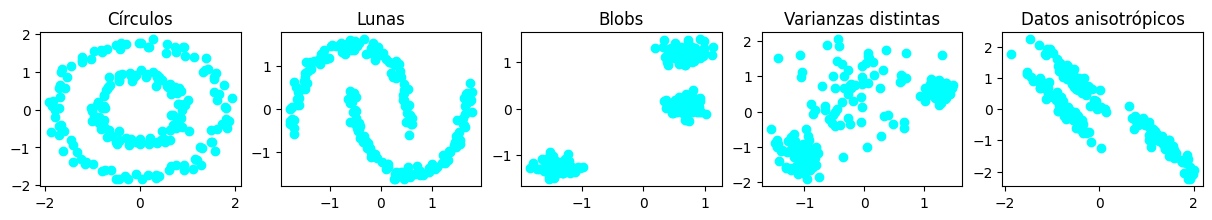

In [87]:
# ============
# Graficamos los datos
# ============
n_rows = 1
n_cols = len(datasets)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(3*n_cols, 2))
axs = axs.flatten()
for (name, data), ax in zip(datasets.items(), axs):
    X, _ = data
    # Normalizamos los datos para que todos estén en la misma escala
    X = StandardScaler().fit_transform(X)
    # TODO: Grafica los datos usando scatter
    # ====== Start of solution =====
    ax.scatter(X[:, 0], X[:, 1], c='cyan') 
    # ====== End of solution =====
    ax.set_title(name)    

### Para los conjuntos de datos anteriores...
Aplica K-means a cada uno de los datasets anteriores. Determina los hiperparámetros (k) que resulten en la mejor asignación según tu criterio para cada grupo.
- ¿En que conjunto/os esperas que k-means realice una solución adecuada? En blobs y posiblemente tambien en datos anisotrópicos aunque tengo mis dudas en ese ultimo.
- ¿Cuales son las asunciones de k-means? K-means asume que le estas dando grupos de datos con varianzas similares y tambien asume que TODOS los datos pertenecen a un grupo, osea que no detecta ruido. 
- ¿Cual de estos conjuntos NO rompe las asunciones de k-means? Blobs

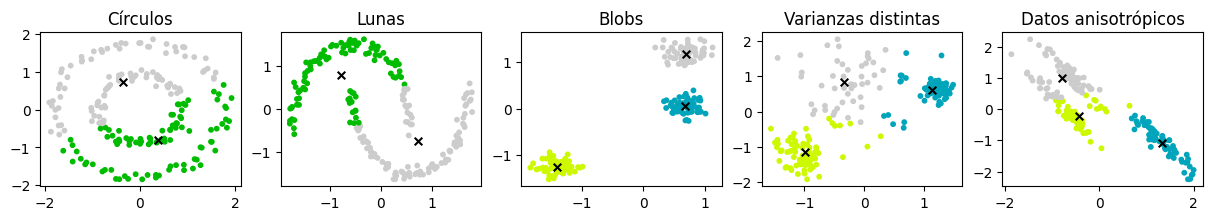

In [88]:
n_rows = 1
n_cols = len(datasets)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(3*n_cols, 2))
axs = axs.flatten()
# TODO: Modifica la cantidad de clusters para cada dataset hasta que encuentres un resultado que te satisfaga
n_clusters = {"Círculos": 2,
              "Lunas": 2,
              "Blobs": 3,
              "Varianzas distintas": 3,
              "Anisotrópicos": 3}
for (name, data), n, ax in zip(datasets.items(), n_clusters.values(), axs):
    X, _ = data
    X = StandardScaler().fit_transform(X)
    ax.set_title(name)
    # TODO: Aplica K-means para encontrar los grupos y los centros de cada cluster
    # Después modifica los hiperparámetros en n_clusters según consideres apropiado para cada dataset
    # ====== Start of solution =====

     # Instanciar KMeans con el número deseado de clusters
    kmeans = KMeans(n)
    # Entreno del modelo
    kmeans.fit(X)

    centers = kmeans.cluster_centers_
    
    # ====== End of solution =====
    ax.scatter(X[:, 0], X[:, 1], s=10, c=kmeans.labels_, vmin=-1)
    ax.scatter(centers[:, 0], centers[:, 1], marker="x", s=30, c='k')

## 2. DBScan
DBScan es otro método de agrupamiento el cual encuentra grupos que funciona a través de densidad local.
En las siguientes celdas, aplica DBScan a cada uno de los datasets anteriores y compara los resultados con los de K-Means. Ajusta los hiperparámetros según tu criterio para lograr un agrupamiento adecuado.

Clusteres en Círculos [0 1]
Clusteres en Lunas [0 1]
Clusteres en Blobs [0 1 2]
Clusteres en Varianzas distintas [-1  0  1  2  3  4]
Clusteres en Datos anisotrópicos [-1  0  1  2]


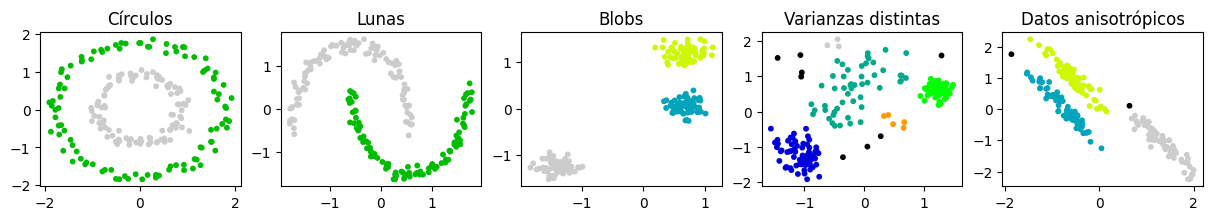

In [130]:
n_rows = 1
n_cols = len(datasets)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(3*n_cols, 2))
axs = axs.flatten()
# TODO: Modifica los hiper parámetros de dbscan hasta encontrar un resultado que te satisfaga
params = {"Círculos": {"eps": 0.4, "min_samples": 1},
          "Lunas": {"eps": 0.5, "min_samples": 1},
          "Blobs": {"eps": 0.5, "min_samples": 1},
          "Varianzas distintas": {"eps": 0.4, "min_samples": 3},
          "Datos anisotrópicos": {"eps": 0.32, "min_samples": 2}}
for ((name, data), ax) in zip(datasets.items(), axs):
    X, _ = data
    X = StandardScaler().fit_transform(X)
    ax.set_title(name)
    eps = params[name]['eps']
    min_samples = params[name]['min_samples']
    # TODO: Aplica DBSCAN para encontrar los clusters
    # Después modifica los hiperparámetros en n_clusters según consideres apropiado para cada dataset
    # ====== Start of solution =====

    # Instanciar DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)

    # Ajustar el modelo y obtener etiquetas
    dbscan = dbscan.fit(X)

    grupos = dbscan.labels_

    # ====== End of solution =====
    print(f"Clusteres en {name}", np.unique(grupos))
    ax.scatter(X[:, 0], X[:, 1], s=10, c=grupos, vmin=-1)

### TODO: Contesta la siguientes preguntas
- ¿Qué diferencia encuentras entre los clusters encontrados con DBSCAN y los clusters encontrados con K-Means? Los cluster de DBSCAN no buscan que tengan la misma varianza.
- ¿Qué metodo clasifica mejor los clusters de Lunas y a qué crees que se deba? DBSCAN, debido a que no busca que los grupos tengan las mismas varianzas. 
- ¿Qué son los puntos negros encontrados con DBSCAN? Profe le habia cambiado los colores y se veian bien bonitos pero ni modo voy a regresar a la paleta orignal. Contestando la pregunta, los puntos negros son el "ruido" o los datos que no pertenecen a ningun grupo. 
- ¿En qué casos crees que sea recomendable utilizar K-means sobre DBSCAN? En caso donde el numero de cluster se conoce de antemano, de ahi su nombre, "K"-means.
- En base a tu experiencia ¿que desventajas notas para DBScan contra K-means? Que a veces es dificil diferenciar un grupo pequeño de una anomalia porque no se conoce el numero de clusters. 
- En base a tu experiencia ¿que ventajas notas para DBScan contra K-means? Puede detectar anomalias. 
- Si entrenamos DBSCAN y queremos buscar un grupo al que pertenezca un punto nuevo, ¿Existe alguna función de sk-learn que nos permita hacer esto?¿Cómo podríamos predecir el grupo al que pertenece un nuevo datapoint?
1.- Nose, la verdad no veo en lo que he buscado.
2.- Si consideramos la distancia del nuevo datapoint a los clusters ya existentes y esta dentro del rango que lo clasifica como parte del grupo lo podemos meter ahi, y si no, es ruido. 